In [7]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline
matplotlib.style.use('ggplot')
import os
import conda
import folium
import requests


from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))


conda_file_dir = conda.__file__
conda_dir = conda_file_dir.split('lib')[0]
proj_lib = os.path.join(os.path.join(conda_dir, 'share'), 'proj')
os.environ["PROJ_LIB"] = proj_lib

from mpl_toolkits.basemap import Basemap




In [8]:
def age_range(age):
    if (age < 13):
        return 'Under 12'
    elif (age> 12) & (age < 20):
        return '13 - 19'
    elif (age > 19) & (age < 36):
        return'20 - 35'
    elif (age > 35) & (age < 50):
        return '36 - 49'
    elif (age > 49) & (age < 65):
        return '50 - 64'
    elif (age> 64):
        return 'Over 65'

In [17]:
ls

#292_folium_chloropleth_USA1.html
Archive/
Black_city_Top_off.csv
Fatal Shooting - Capstone 1.ipynb
Hispanic_city_Top_off.csv
How to fill NAs with a mean of each race .ipynb
Untitled.ipynb
White_city_Top_off.csv
fatal-police-shootings-Nov 21.csv
final- Nov21.csv
final.csv
mymap.html
police-shooting.html
rates_by_cities
state_circum
state_circum.csv
states.json
style-notebook.css
style-table.css
top1_off_cities.csv
top_off_cities.csv
top_off_state.csv


In [294]:
#shooting.info()
shooting_top_race['age'] = shooting_top_race['age'].astype('int32')

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [11]:

circum = pd.read_csv('state_circum.csv', index_col = None ,
                                 encoding = 'ISO-8859-1' )
shooting = pd.read_csv('final- Nov21.csv', index_col = None ,
                                 encoding = 'ISO-8859-1')
#top_off_cities = pd.read_csv('top1_off_cities.csv')
#top_off_state = pd.read_csv('top_off_state.csv')
shooting['date'] = pd.to_datetime(shooting['date'])
shooting['Age_range'] = shooting['age'].apply(lambda row : age_range(row) )
shooting = shooting[~(shooting.name == 'TK TK')]
shooting['daysofweek'] = shooting.date.dt.day_name()
shooting['year'] =shooting.date.dt.year

In [111]:
age_map = shooting[['age' , 'race']].groupby('race').mean()
age_dict = age_map.to_dict()['age']
shooting['age'] = shooting['age'].fillna(shooting['race'].map(age_dict))
shooting['armed'] = shooting['armed'].str.lower()

In [21]:
female = shooting[shooting.gender == 'F']
male = shooting[shooting.gender == 'M']


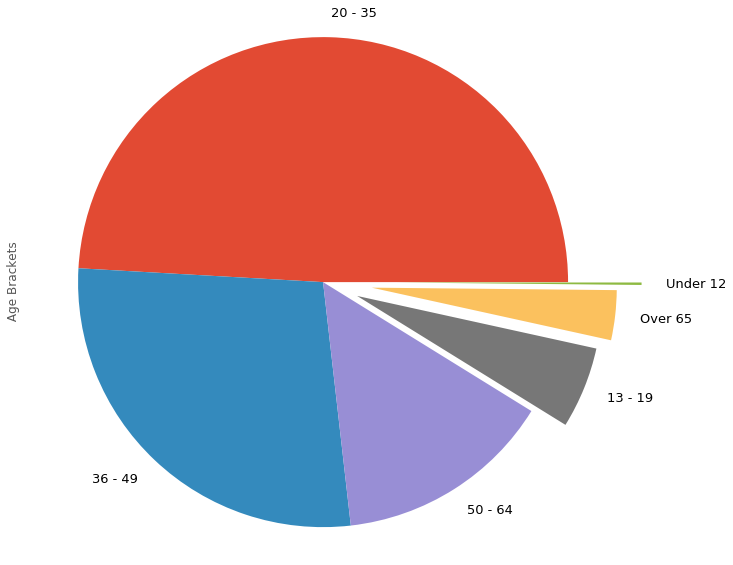

In [368]:
plt.figure(figsize=(12,10))
explode = ( 0, 0, 0, 0.15, 0.2,0.3) 
shooting['Age_range'].value_counts().plot(kind = 'pie' , explode = explode , fontsize = 13)
plt.axis('equal')
_ = plt.ylabel(' Age Brackets')

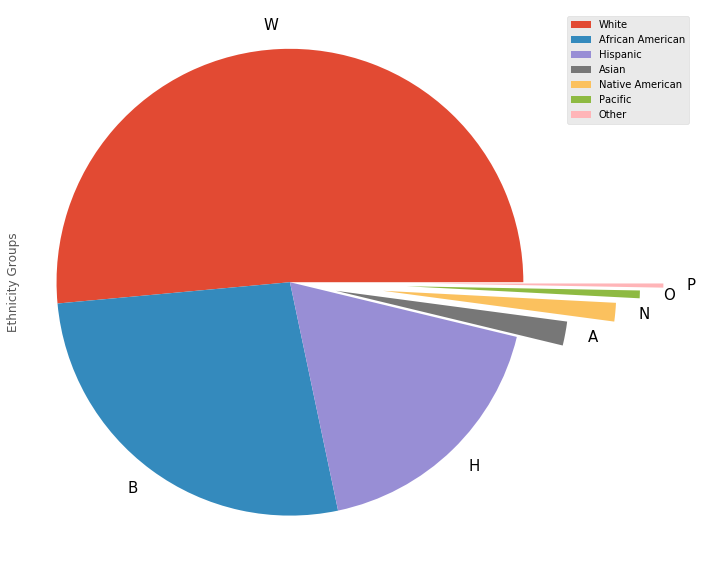

In [359]:
plt.figure(figsize=(12,10))
explode = (0, 0, 0, 0.2, 0.4, 0.5,0.6)
shooting.race.value_counts(dropna=False).plot(kind = 'pie' , explode = explode , fontsize = 15)
plt.axis('equal')
_ = plt.ylabel('Ethnicity Groups')
l = plt.legend(['White' , 'African American' , 'Hispanic' , 'Asian' , 'Native American' , 'Pacific' , 'Other'])

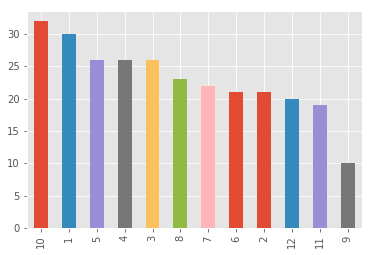

In [34]:
l = female.date.dt.month.value_counts().plot(kind = 'bar')

In [362]:
male2 = male[~(male.year == 2018)]

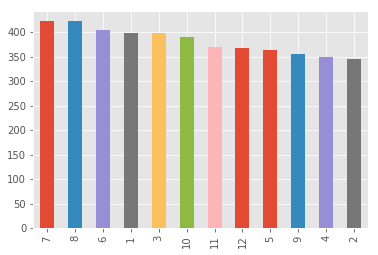

In [363]:
l = male2.date.dt.month.value_counts().plot(kind = 'bar')

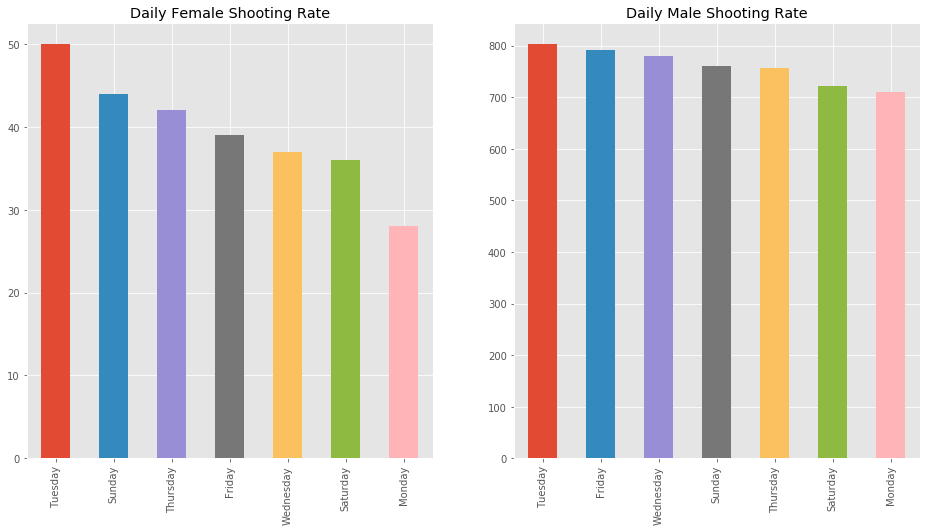

In [345]:
plt.figure(figsize=(16,8))
plt.subplot(1, 2, 1)
f = female.date.dt.day_name().value_counts().plot(kind = 'bar' , title = 'Daily Female Shooting Rate')
plt.subplot(1,2,2)
m = male.date.dt.day_name().value_counts().plot(kind = 'bar', title = 'Daily Male Shooting Rate')

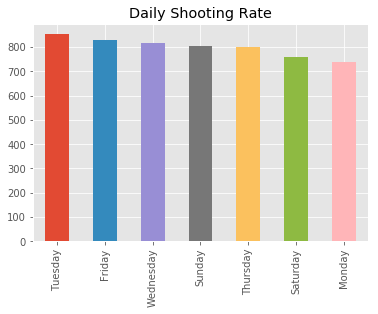

In [349]:
s = shooting.date.dt.day_name().value_counts().plot(kind = 'bar' , title = 'Daily Shooting Rate')

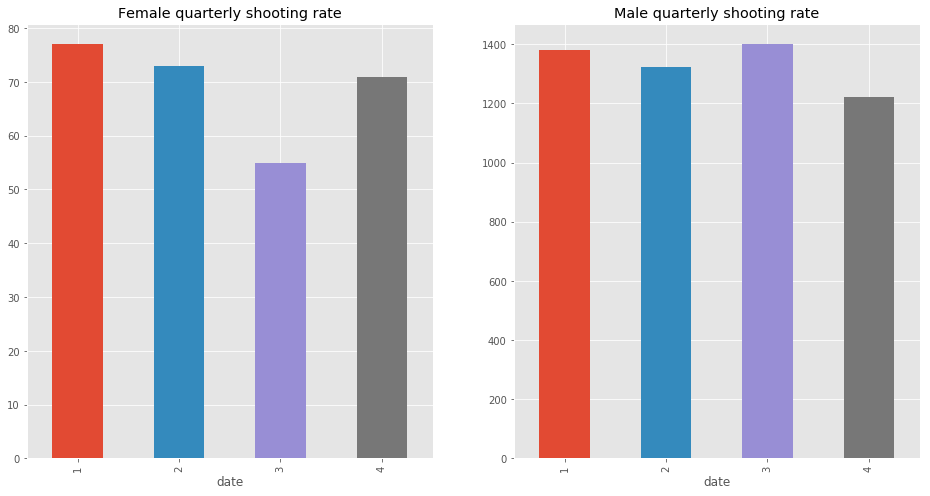

In [37]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
l = female.groupby([female.date.dt.quarter])['year'].count().plot(kind = 'bar')
plt.title('Female quarterly shooting rate')
plt.subplot(1,2,2)
ll = male.groupby(male.date.dt.quarter)['year'].count().plot(kind = 'bar')
m = plt.title('Male quarterly shooting rate')

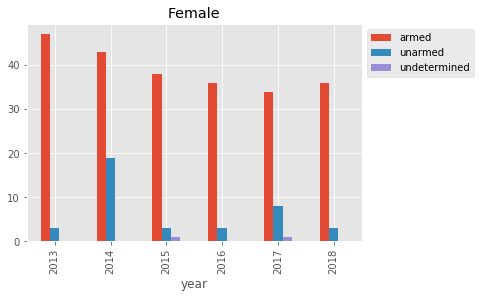

In [39]:
l = female.groupby(['year', 'armed'])['gender'].count().unstack().plot(kind = 'bar')
l = plt.legend(loc='upper right' , bbox_to_anchor=(1.35, 1))
ll = plt.title('Female')

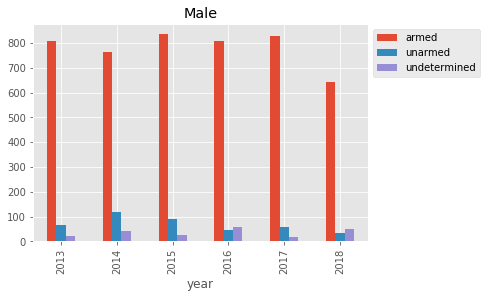

In [58]:
l = male.groupby(['year', 'armed'])['gender'].count().unstack().plot(kind = 'bar')
l = plt.legend(loc='upper right' , bbox_to_anchor=(1.35, 1))
ll = plt.title('Male')

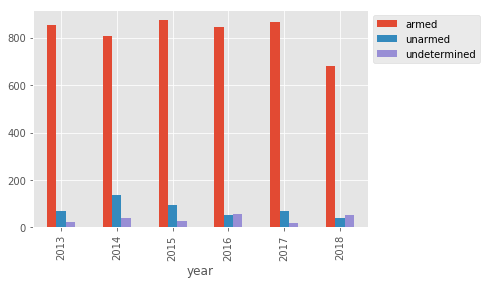

In [352]:
s = shooting.groupby(['year' , 'armed'])['year'].count().unstack().plot(kind = 'bar')
l = plt.legend(loc='upper right' , bbox_to_anchor=(1.35, 1))

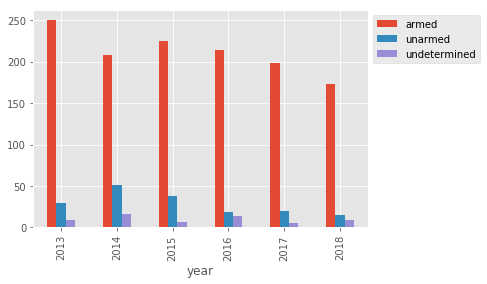

In [365]:
shooting[shooting.race == 'B'].groupby(['year', 'armed'])['race'].count().unstack().plot(kind = 'bar')
l = plt.legend(loc='upper right' , bbox_to_anchor=(1.35, 1))
#ll = plt.title('African American Deceased')

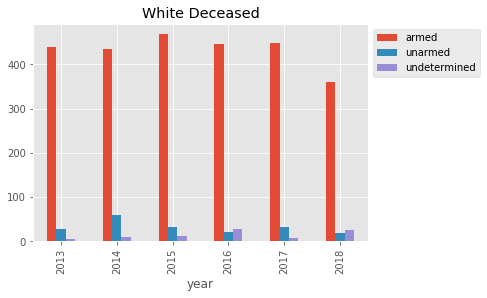

In [63]:
shooting[shooting.race == 'W'].groupby(['year', 'armed'])['race'].count().unstack().plot(kind = 'bar')
l = plt.legend(loc='upper right' , bbox_to_anchor=(1.35, 1))
ll = plt.title('White Deceased')

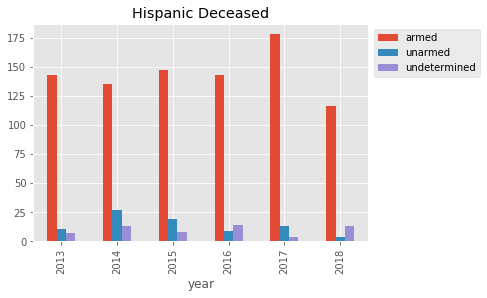

In [64]:
shooting[shooting.race == 'H'].groupby(['year', 'armed'])['race'].count().unstack().plot(kind = 'bar')
l = plt.legend(loc='upper right' , bbox_to_anchor=(1.35, 1))
ll = plt.title('Hispanic Deceased')

In [76]:
shooting_top_race = shooting[(shooting.race == 'W') | (shooting.race == 'B') | (shooting.race == 'H')]

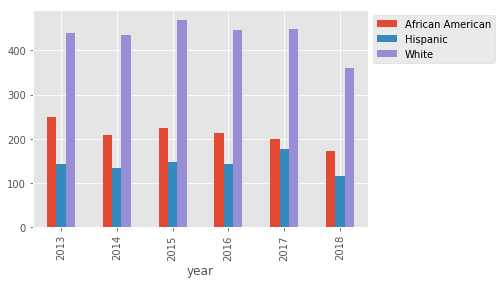

In [396]:
shooting_top_race[shooting_top_race.armed == 'armed'].groupby(['year' , 'race'])['race'].count().unstack().plot(kind = 'bar')
#l = plt.legend(loc='upper right' , bbox_to_anchor=(1.17, 1) )
l = plt.legend(['African American' , 'Hispanic' , 'White'] , bbox_to_anchor=(1, 1))

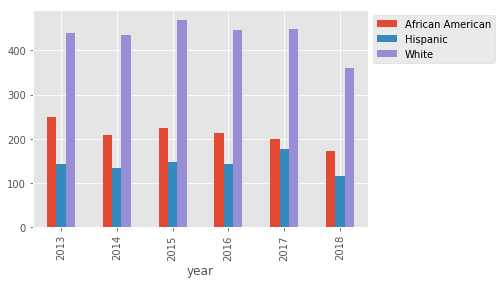

In [397]:

shooting_top_race[shooting_top_race.armed == 'armed'].groupby(['year' , 'race'])['race'].count().unstack().plot(kind = 'bar')
l = plt.legend(loc='upper right' , bbox_to_anchor=(1.17, 1))
l = plt.legend(['African American' , 'Hispanic' , 'White'] , bbox_to_anchor=(1, 1))

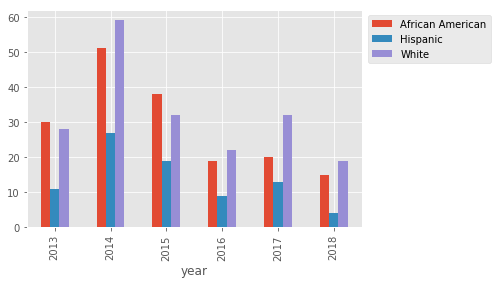

In [403]:
shooting_top_race[shooting_top_race.armed == 'unarmed'].groupby(['year' , 'race'])['race'].count().unstack().plot(kind = 'bar')
l = plt.legend(loc='upper right' , bbox_to_anchor=(1.17, 1))
l = plt.legend(['African American' , 'Hispanic' , 'White'] , bbox_to_anchor=(1.40, 1))

In [386]:
df1 = shooting_top_race.groupby(['year' , 'race'])['race'].count().unstack()
df1

race,B,H,W
year,,,
2013,289,161,474
2014,275,175,504
2015,270,174,512
2016,247,166,497
2017,224,195,488
2018,199,133,407


In [387]:
df2 = shooting_top_race[shooting_top_race.armed == 'unarmed'].groupby(['year' , 'race'])['race'].count().unstack()
df2

race,B,H,W
year,,,
2013,30,11,28
2014,51,27,59
2015,38,19,32
2016,19,9,22
2017,20,13,32
2018,15,4,19


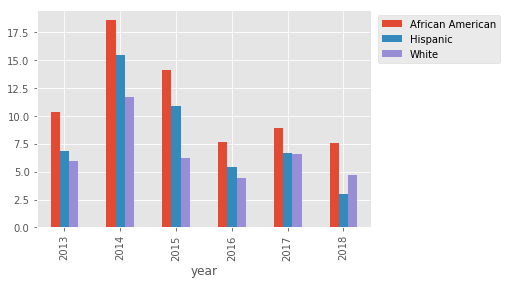

In [404]:
df3 = round(df2*100 / df1 , 2)
df3
l = df3.plot(kind = 'bar')
l = plt.legend(['African American' , 'Hispanic' , 'White'] , bbox_to_anchor=(1.40, 1))

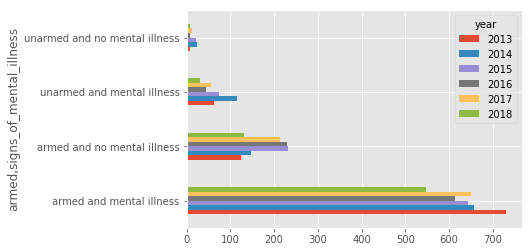

In [405]:
ax = shooting[(shooting.armed == 'armed') | (shooting.armed == 'unarmed')].groupby(['armed' , 'signs_of_mental_illness' ])['year'].value_counts().unstack().plot(kind = 'barh' , title = '' )
l = ax.set_yticklabels(['armed and mental illness' , 'armed and no mental illness' , 'unarmed and mental illness' , 'unarmed and no mental illness'])

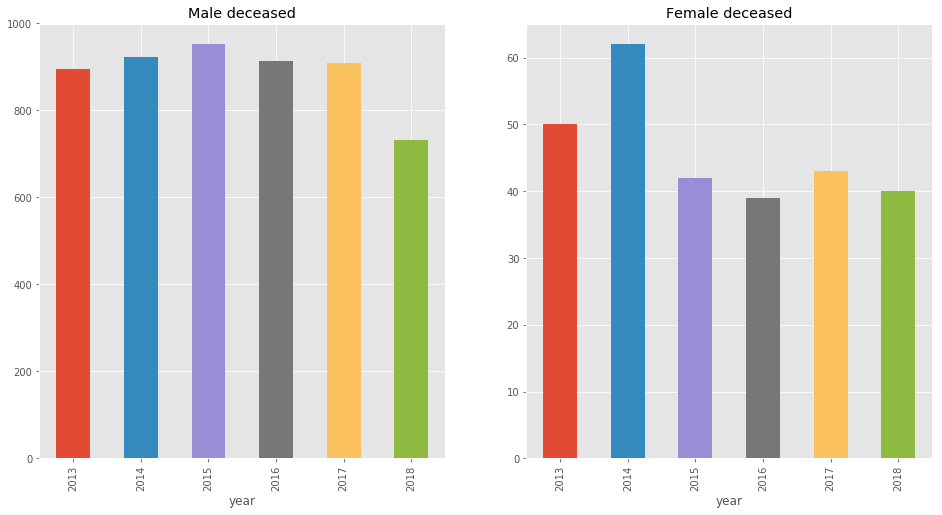

In [85]:
plt.figure(figsize=(16,8))
plt.subplot(1, 2, 1)
m = male.groupby('year')['name'].count().plot(kind = 'bar' , title = 'Male deceased' )

plt.subplot(1, 2, 2)
f = female.groupby('year')['name'].count().plot(kind = 'bar' , title = 'Female deceased')


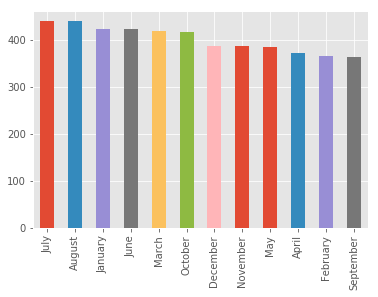

In [408]:
#s2 = shooting[~(shooting.year == 2018)]
s = s2.date.dt.month_name().value_counts().plot(kind = 'bar')

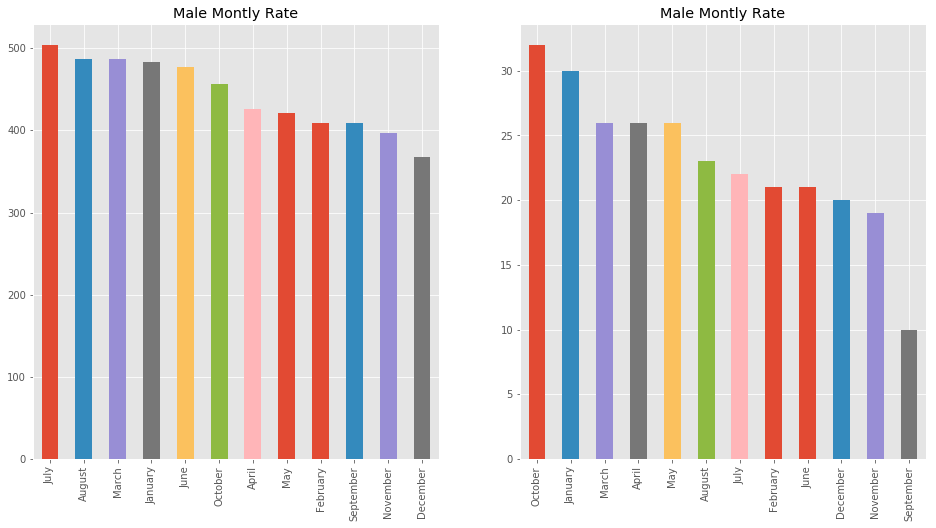

In [88]:
plt.figure(figsize=(16,8))
plt.subplot(1, 2, 1)
m = male.date.dt.month_name().value_counts().plot(kind = 'bar' , title = 'Male Montly Rate')
plt.subplot(1, 2, 2)
r = female.date.dt.month_name().value_counts().plot(kind = 'bar', title = 'Male Montly Rate')

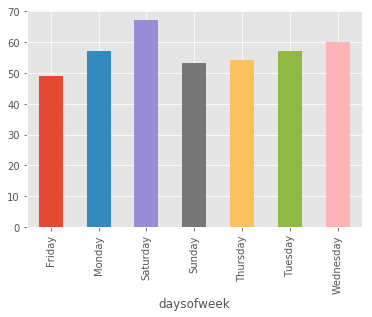

In [89]:
s = shooting[shooting.body_camera == True].groupby('daysofweek')['year'].count().plot(kind = 'bar')

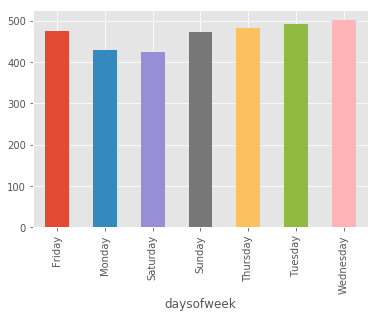

In [90]:
s = shooting[shooting.body_camera == False].groupby('daysofweek')['year'].count().plot(kind = 'bar')

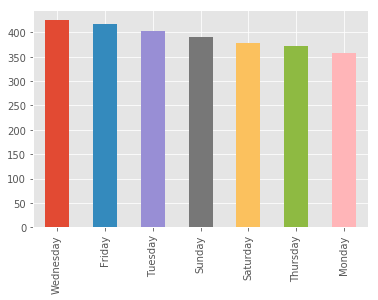

In [91]:
s = shooting[shooting.Age_range == '20 - 35']['daysofweek'].value_counts().plot(kind = 'bar')

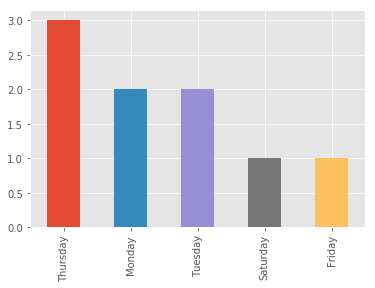

In [92]:
s = shooting[shooting.Age_range == 'Under 12']['daysofweek'].value_counts().plot(kind = 'bar')

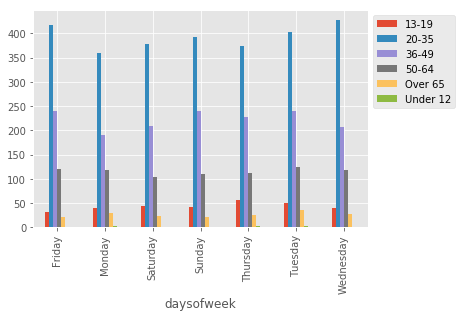

In [431]:
shooting.groupby(['daysofweek', 'Age_range'])[[ 'daysofweek' ]].count().unstack().plot(kind = 'bar')#['daysofweek'].value_counts().plot(kind = 'bar')
#l = plt.legend(['Friday' , 'Monday' , 'Saturday' , 'Sunday', 'Thursday' , 'Tuesday' ,'Wednesday' ])
l = plt.legend(['13-19' , '20-35' , '36-49' , '50-64', 'Over 65' , 'Under 12'] , bbox_to_anchor=(1, 1))

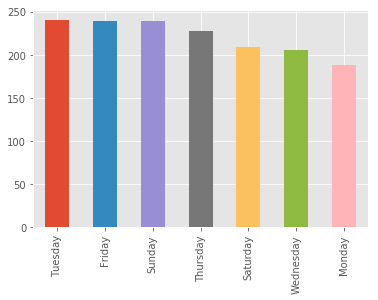

In [93]:
s = shooting[shooting.Age_range == '36 - 49']['daysofweek'].value_counts().plot(kind = 'bar')

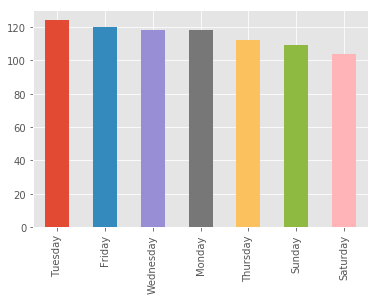

In [94]:
s = shooting[shooting.Age_range == '50 - 64']['daysofweek'].value_counts().plot(kind = 'bar')

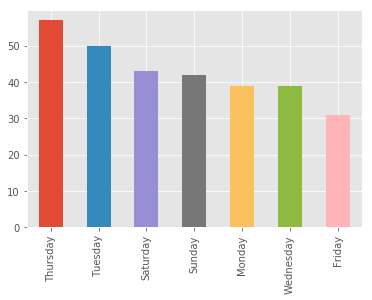

In [95]:
s = shooting[shooting.Age_range == '13 - 19']['daysofweek'].value_counts().plot(kind = 'bar')

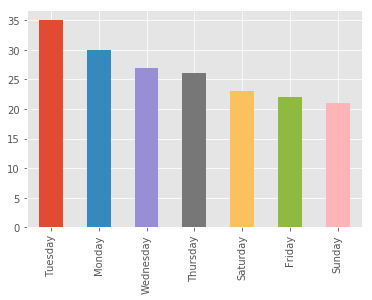

In [96]:
s = shooting[shooting.Age_range == 'Over 65']['daysofweek'].value_counts().plot(kind = 'bar')

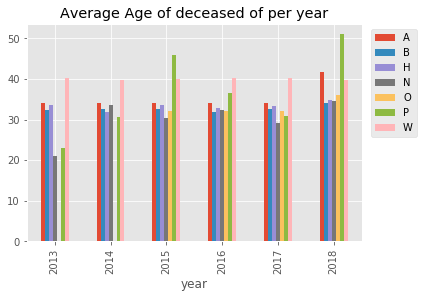

In [100]:
round(shooting.groupby(['year' , 'race'])['age'].mean(), 2).unstack().plot(kind = 'bar' , title = 'Average Age of deceased of per year')
l = plt.legend(loc='upper right' , bbox_to_anchor=(1.18, 1))
#ll = plt.title('Average of victims age')

In [ ]:
round(shooting.groupby(['year' , 'race'])['age'].mean(), 2).unstack()

In [ ]:
shooting.groupby(['Age_range' , 'year'])['race'].count().unstack()

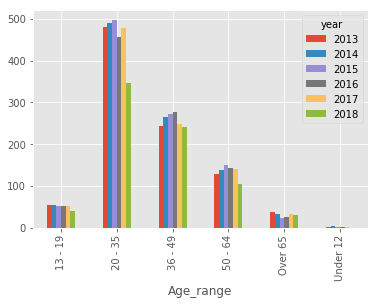

In [101]:
a = shooting.groupby(['Age_range' , 'year'])['race'].count().unstack().plot(kind = 'bar')

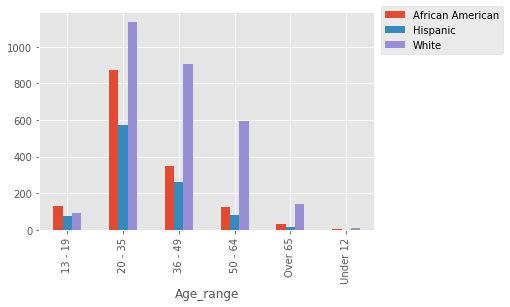

In [446]:
r = shooting_top_race.groupby([ 'Age_range' , 'race']).Age_range.count().unstack().plot(kind = 'bar')
rr = plt.legend(['African American' , 'Hispanic' , 'White'] , bbox_to_anchor=(1.4, 1.05))
#plt.xlim('African American' , 'Hispanic' , 'White')
#plt.xscale('African American' , 'Hispanic' , 'White')

In [104]:
weekend = shooting[(shooting.daysofweek == 'Saturday') | (shooting.daysofweek == 'Sunday')]
weekdays = shooting[~(shooting.daysofweek == 'Saturday') | (shooting.daysofweek == 'Sunday')]

In [105]:
unarmed_weekend = weekend[weekend.armed == 'unarmed']
armed_weekend = weekend[~(weekend.armed == 'unarmed')]

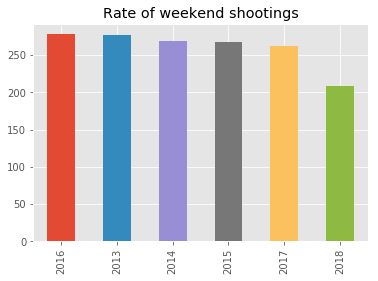

In [151]:
l = weekend.year.value_counts().plot(kind = 'bar' , title = 'Rate of weekend shootings')


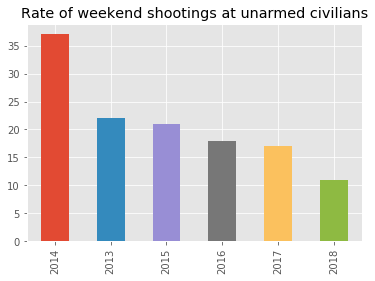

In [147]:
l = unarmed_weekend['year'].value_counts().plot(kind = 'bar' , title = 'Rate of weekend shootings at unarmed civilians')


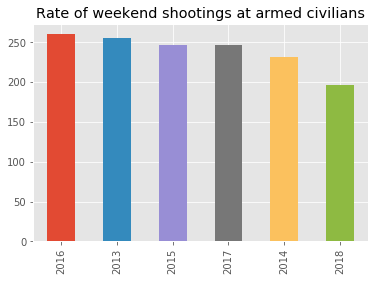

In [148]:
l = armed_weekend['year'].value_counts().plot(kind = 'bar' , title = 'Rate of weekend shootings at armed civilians')


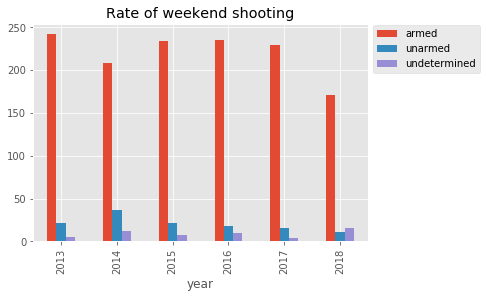

In [157]:
weekend.groupby('year')['armed'].value_counts().unstack().plot(kind = 'bar' , title = 'Rate of weekends shootings')
rr = plt.legend(bbox_to_anchor=(1., 1.02))

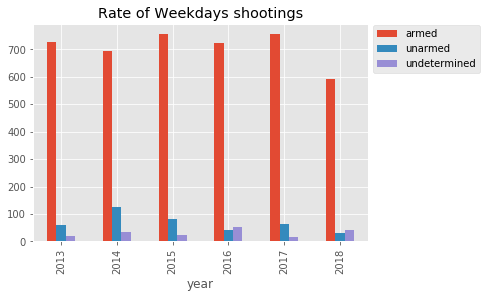

In [158]:
weekdays.groupby('year')['armed'].value_counts().unstack().plot(kind = 'bar' , title = 'Rate of Weekdays shootings')
rr = plt.legend(bbox_to_anchor=(1., 1.02))

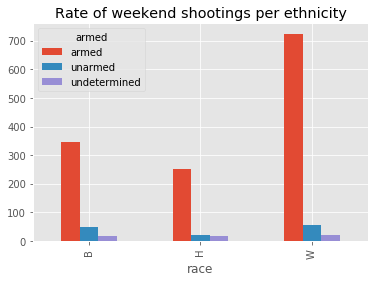

In [155]:
weekend = weekend[(weekend.race == 'B')| (weekend.race == 'W') | (weekend.race == 'H')]
w = weekend.groupby([ 'race', 'armed'])['race'].count().unstack().plot(kind = 'bar' , title = 'Rate of weekend shootings per ethnicity')

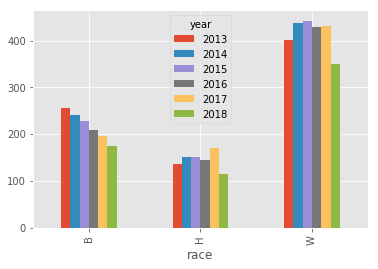

In [159]:
weekdays2 = weekdays[(weekdays.race == 'B')| (weekdays.race == 'W') | (weekdays.race == 'H')]
w2 = weekdays2.groupby(['race' , 'year'])['year'].count().unstack().plot(kind = 'bar')

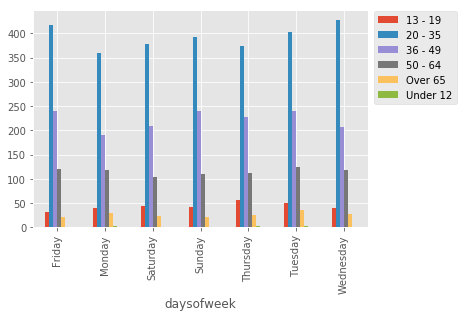

In [160]:
shooting.groupby(['daysofweek' , 'Age_range'])['race'].count().unstack().plot(kind = 'bar')
l = plt.legend(loc='center right' , bbox_to_anchor=(1.28, 0.78))

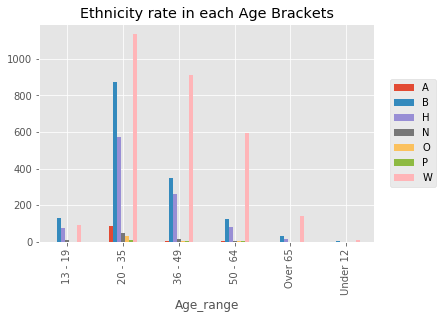

In [163]:
shooting.groupby(['Age_range', 'race'])['daysofweek'].count().unstack('race').plot(kind = 'bar' , title = 'Ethnicity rate in each Age Brackets')
l = plt.legend(loc='center right' , bbox_to_anchor=(1.2, 0.5))



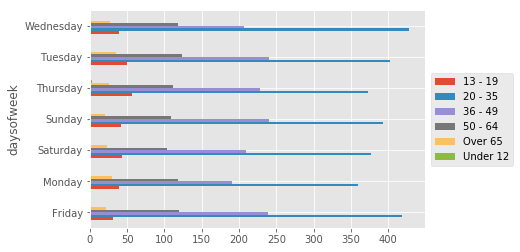

In [164]:
shooting.groupby(['daysofweek' , 'Age_range'])['gender'].count().unstack().plot(kind = 'barh')
l = plt.legend(loc='center right' , bbox_to_anchor=(1.28, 0.5))

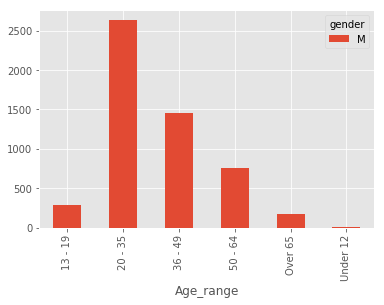

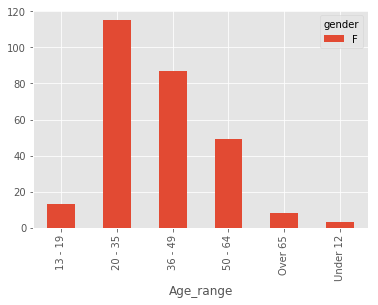

In [166]:
m = male.groupby(['Age_range', 'gender'])['race'].count().unstack().plot(kind = 'bar')

f = female.groupby(['Age_range', 'gender'])['race'].count().unstack().plot(kind = 'bar')

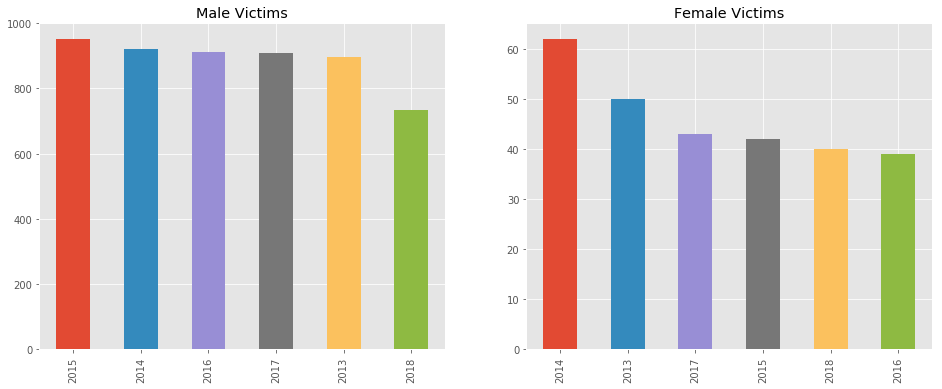

In [170]:
plt.figure(figsize=(16,6))
plt.subplot(1,2 , 1)
l = male['year'].value_counts().plot(kind = 'bar' )
lm = l.set_title('Male Victims')
plt.subplot(1,2 , 2)
ll = female['year'].value_counts().plot(kind = 'bar')
lf = ll.set_title('Female Victims')

In [172]:
circum.head()

,index,state,poverty_rate,Median Income,percent_completed_hs,no_victims
0,0,AK,19.85,52099.59,84.63,28
1,1,AL,20.65,40577.31,80.30,106
2,2,AR,22.96,35593.41,79.95,58
3,3,AZ,25.67,42495.67,80.47,246
4,4,CA,17.12,62652.87,81.96,836


In [195]:
#df1 =pd.DataFrame(shooting.state.value_counts())
#df1.rename(columns= {'index' : 'state' , 'state' : 'victims'}, inplace= True)
#df1.reset_index(inplace=True)
df1.columns = ['state' , 'victims']

In [196]:
df1.head()

,state,victims
0,CA,879
1,TX,476
2,FL,389
3,AZ,270
4,GA,177


In [197]:
circum.head()

,index,state,poverty_rate,Median Income,percent_completed_hs,no_victims
0,0,AK,19.85,52099.59,84.63,28
1,1,AL,20.65,40577.31,80.30,106
2,2,AR,22.96,35593.41,79.95,58
3,3,AZ,25.67,42495.67,80.47,246
4,4,CA,17.12,62652.87,81.96,836


In [199]:
circum = circum.merge(df1 , how = 'inner' , on = 'state' )

In [205]:
circum.head()

,state,poverty_rate,Median Income,percent_completed_hs,victims
0,AK,19.85,52099.59,84.63,31
1,AL,20.65,40577.31,80.30,108
2,AR,22.96,35593.41,79.95,68
3,AZ,25.67,42495.67,80.47,270
4,CA,17.12,62652.87,81.96,879


In [210]:
B_City_top_off = shooting_top_race.groupby(['city' , 'state'])['race'].value_counts().unstack().sort_values(by = 'B' , ascending = False).head(20)
B_City_top_off.to_csv('Black_city_Top_off.csv', index= True)

In [211]:
W_City_top_off = shooting_top_race.groupby(['city' , 'state'])['race'].value_counts().unstack().sort_values(by = 'W' , ascending = False).head(20)
W_City_top_off.to_csv('White_city_Top_off.csv', index= True)

In [212]:
H_City_top_off = shooting_top_race.groupby(['city' , 'state'])['race'].value_counts().unstack().sort_values(by = 'H' , ascending = False).head(20)
H_City_top_off.to_csv('Hispanic_city_Top_off.csv', index= True)

In [220]:
top_off_cities = pd.concat([B_City_top_off , W_City_top_off , H_City_top_off])
top_off_cities.drop_duplicates(inplace= True)
top_off_cities['total'] = top_off_cities.sum(axis = 1)
top_off_cities.sort_values(by = 'total' , inplace= True , ascending= False)

In [469]:
t = top_off_cities[['B' , 'W' , 'H']].plot(kind = 'barh', figsize=(15, 30) , title = 'Cities with the highest number of shootings')
l = plt.legend(loc='upper right' , bbox_to_anchor=(1.08, 1))

In [222]:
top_off_cities.head()

,race,B,H,W,total
city,state,,,,
Los Angeles,CA,24.0,41.0,18.0,83.0
Phoenix,AZ,13.0,30.0,39.0,82.0
Chicago,IL,47.0,10.0,4.0,61.0
Houston,TX,31.0,18.0,7.0,56.0
Las Vegas,NV,10.0,11.0,23.0,44.0


In [225]:
B_state_off = shooting_top_race.groupby('race')['state'].value_counts().unstack().transpose().sort_values(by = 'B' , ascending = False).head(10)
B_state_off

race,B,H,W
state,,,
CA,154.0,382.0,296.0
FL,134.0,49.0,201.0
TX,109.0,148.0,209.0
IL,76.0,18.0,45.0
GA,74.0,10.0,91.0
OH,64.0,2.0,97.0
NC,63.0,8.0,83.0
LA,59.0,4.0,48.0
MD,58.0,4.0,29.0


In [224]:
W_state_off = shooting_top_race.groupby('race')['state'].value_counts().unstack().transpose().sort_values(by = 'W' , ascending = False).head(10)
W_state_off

race,B,H,W
state,,,
CA,154.0,382.0,296.0
TX,109.0,148.0,209.0
FL,134.0,49.0,201.0
AZ,27.0,92.0,141.0
WA,19.0,20.0,100.0
OH,64.0,2.0,97.0
TN,31.0,2.0,96.0
GA,74.0,10.0,91.0
OK,39.0,14.0,88.0


In [226]:
H_state_off = shooting_top_race.groupby('race')['state'].value_counts().unstack().transpose().sort_values(by = 'H' , ascending = False).head(10)
H_state_off

race,B,H,W
state,,,
CA,154.0,382.0,296.0
TX,109.0,148.0,209.0
AZ,27.0,92.0,141.0
NM,4.0,64.0,39.0
FL,134.0,49.0,201.0
CO,16.0,48.0,81.0
NV,16.0,23.0,56.0
WA,19.0,20.0,100.0
IL,76.0,18.0,45.0


In [227]:
top_off_state = pd.concat([B_state_off , W_state_off , H_state_off])
top_off_state.drop_duplicates(inplace=True)
top_off_state['total']=top_off_state.sum(axis=1)
top_off_state.sort_values(by = 'total' , inplace= True , ascending= False)

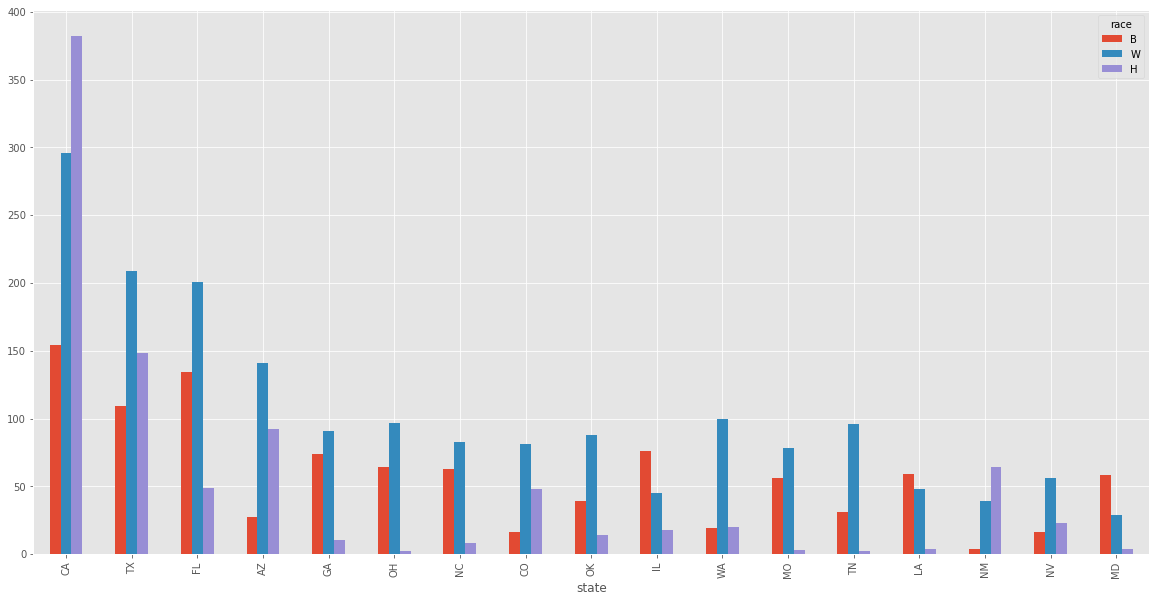

In [228]:
l = top_off_state[['B' , 'W' , 'H']].plot(kind = 'bar',figsize=(20, 10) )

In [58]:
import pandas as pd
import folium
import requests


state_geo = pd.read_json('states.json')


# Initialize the map:
m = folium.Map(location=[39, -97], zoom_start=4.5)

m.choropleth(geo_path='states.json', data=circum,
             columns=['state', 'no_victims'],
             key_on='feature.id',
             fill_color='PuRd', fill_opacity=0.8, line_opacity=0.2,
             threshold_scale = [0 ,50 , 200 , 400 , 600 , 844],
             legend_name='Demographic Distribution')

folium.LayerControl().add_to(m)
m.save('police-shooting.html')
m

In [59]:
import folium
import pandas as pd
from mpl_toolkits.basemap import Basemap
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot') 


top1_off_cities = pd.read_csv('top_off_cities.csv')

# Add marker one by one on the map
for i in range(0,len(top1_off_cities)):
    folium.CircleMarker(
      location=[top1_off_cities.iloc[i]['LAT'] , top1_off_cities.iloc[i]['LON'] * -1],
      popup=top1_off_cities.iloc[i]['city'],
      radius=top1_off_cities.iloc[i]['total']*1000,
      fill_opacity=0.56,
      color='black',
      fill_color='purple').add_to(m)
m.save('state_rate.html')
m

In [61]:
import pandas as pd
import folium
import requests


state_geo = pd.read_json('states.json')


# Initialize the map:
m = folium.Map(location=[39, -97], zoom_start=4.5)

m.choropleth(geo_path='states.json', data=circum,
             columns=['state', 'no_victims'],
             key_on='feature.id',
             fill_color='PuRd', fill_opacity=0.8, line_opacity=0.2,
             threshold_scale = [0 ,50 , 200 , 400 , 600 , 844],
             legend_name='Demographic Distribution')

folium.LayerControl().add_to(m)
m

In [62]:
import folium
import pandas as pd
from mpl_toolkits.basemap import Basemap
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot') 


Black_city_Top_off = pd.read_csv('Black_city_Top_off.csv')

# Add marker one by one on the map
for i in range(0,len(Black_city_Top_off)):
    folium.CircleMarker(
      location=[Black_city_Top_off.iloc[i]['LAT'] , Black_city_Top_off.iloc[i]['LON'] * -1],
      popup=Black_city_Top_off.iloc[i]['city'],
      radius=Black_city_Top_off.iloc[i]['B']*1500,
      fill_opacity=0.7,
      color='black',
      fill_color='grey').add_to(m)
m.save('Black_offenders.html')
m

In [63]:
import pandas as pd
import folium
import requests


state_geo = pd.read_json('states.json')


# Initialize the map:
m = folium.Map(location=[39, -97], zoom_start=4.5)

m.choropleth(geo_path='states.json', data=circum,
             columns=['state', 'no_victims'],
             key_on='feature.id',
             fill_color='PuRd', fill_opacity=0.8, line_opacity=0.2,
             threshold_scale = [0 ,50 , 200 , 400 , 600 , 844],
             legend_name='Demographic Distribution')

folium.LayerControl().add_to(m)
#m.save('police-shooting.html')


m

In [64]:
import folium
import pandas as pd
from mpl_toolkits.basemap import Basemap
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot') 


White_city_Top_off = pd.read_csv('White_city_Top_off.csv')

# Add marker one by one on the map
for i in range(0,len(White_city_Top_off)):
    folium.CircleMarker(
      location=[White_city_Top_off.iloc[i]['LAT'] , White_city_Top_off.iloc[i]['LON'] * -1],
      popup=White_city_Top_off.iloc[i]['city'],
      radius=White_city_Top_off.iloc[i]['W']*1500,
      color = 'white',
      fill_opacity=0.7,
      fill_color='blue').add_to(m)
m.save('White_offenders.html')
m

In [66]:
import pandas as pd
import folium
import requests


state_geo = pd.read_json('states.json')


# Initialize the map:
m = folium.Map(location=[39, -97], zoom_start=4.5)

m.choropleth(geo_path='states.json', data=circum,
             columns=['state', 'no_victims'],
             key_on='feature.id',
             fill_color='PuRd', fill_opacity=0.8, line_opacity=0.2,
             threshold_scale = [0 ,50 , 200 , 400 , 600 , 844],
             legend_name='Demographic Distribution')

folium.LayerControl().add_to(m)
#m.save('police-shooting.html')


m

In [67]:
import folium
import pandas as pd
from mpl_toolkits.basemap import Basemap
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot') 


Hispanic_city_Top_off = pd.read_csv('Hispanic_city_Top_off.csv')

# Add marker one by one on the map
for i in range(0,len(Hispanic_city_Top_off)):
    folium.CircleMarker(
      location=[Hispanic_city_Top_off.iloc[i]['LAT'] , Hispanic_city_Top_off.iloc[i]['LON'] * -1],
      popup=Hispanic_city_Top_off.iloc[i]['city'],
      radius=Hispanic_city_Top_off.iloc[i]['H']*1500,
      color = 'white',
      fill_opacity=0.75,
      fill_color='green').add_to(m)
m.save('Hispanic_offenders.html')
m

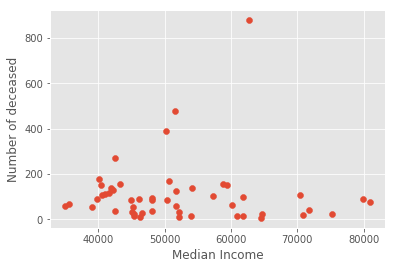

In [465]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')
y = circum.victims
x = circum['Median Income']
plt.scatter(x, y)
plt.xlabel('Median Income')
plt.ylabel('Number of deceased')
plt.show()

In [460]:
circum.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 5 columns):
state                   51 non-null object
poverty_rate            51 non-null float64
Median Income           51 non-null float64
percent_completed_hs    51 non-null float64
victims                 51 non-null int64
dtypes: float64(3), int64(1), object(1)
memory usage: 2.4+ KB


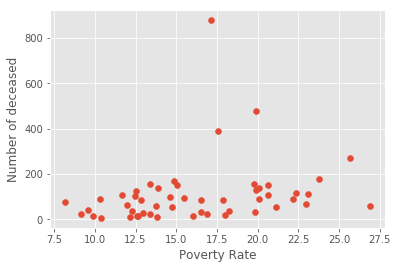

In [464]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')
y = circum.victims
x = circum['poverty_rate']
plt.scatter(x, y)
plt.xlabel('Poverty Rate')
plt.ylabel('Number of deceased')
plt.show()

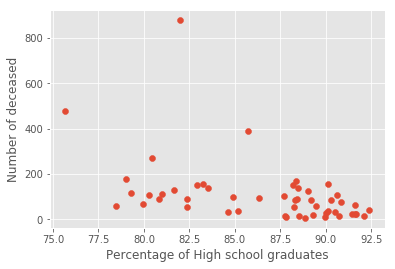

In [466]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')
y = circum.victims
x = circum['percent_completed_hs']
plt.scatter(x, y)
plt.xlabel('Percentage of High school graduates')
plt.ylabel('Number of deceased')
plt.show()

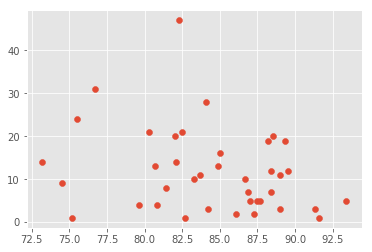

In [457]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')
y = top1_off_cities.B
x = top1_off_cities.percent_completed_hs
plt.scatter(x, y)
plt.show()

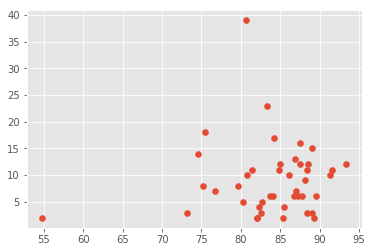

In [254]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')
y = top1_off_cities.W
x = top1_off_cities.percent_completed_hs
plt.scatter(x, y)
plt.show()

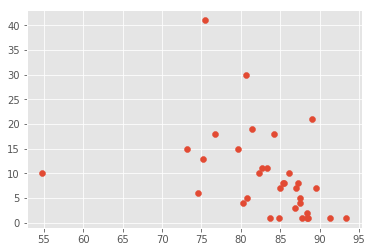

In [255]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')
y = top1_off_cities.H
x = top1_off_cities.percent_completed_hs
plt.scatter(x, y)
plt.show()

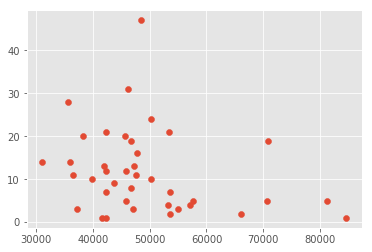

In [256]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')
y = top1_off_cities.B
x = top1_off_cities['Median Income']
plt.scatter(x, y)
plt.show()

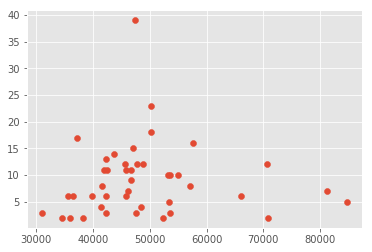

In [257]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')
y = top1_off_cities.W
x = top1_off_cities['Median Income']
plt.scatter(x, y)
plt.show()

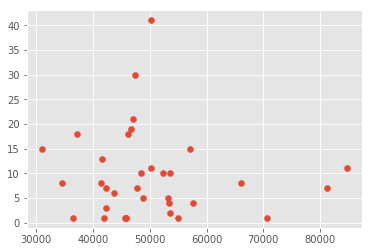

In [258]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')
y = top1_off_cities.H
x = top1_off_cities['Median Income']
plt.scatter(x, y)
plt.show()

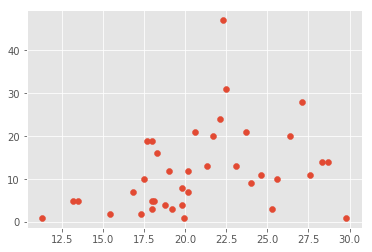

In [259]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')
y = top1_off_cities.B
x = top1_off_cities['poverty_rate']
plt.scatter(x, y)
plt.show()

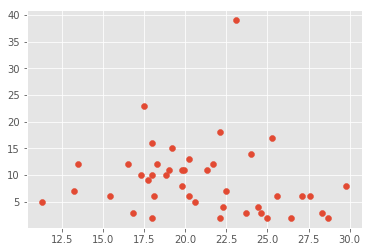

In [260]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')
y = top1_off_cities.W
x = top1_off_cities['poverty_rate']
plt.scatter(x, y)
plt.show()

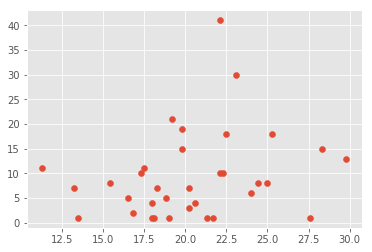

In [261]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')
y = top1_off_cities.H
x = top1_off_cities['poverty_rate']
plt.scatter(x, y)
plt.show()

# Infrential Statistics 

H0 : P(W) = P(B)

Ha : P(W) ≠ P(B)

In [5]:
import scipy.stats as stats
import pandas as pd

In [21]:
shooting_BW = shooting[(shooting.race == 'W') | (shooting.race == 'B')]

In [30]:
shooting_BH = shooting[(shooting.race == 'H') | (shooting.race == 'B')]

In [34]:
shooting_WH = shooting[(shooting.race == 'H') | (shooting.race == 'W')]

In [22]:
shooting_BHW = shooting[(shooting.race == 'W') | (shooting.race == 'B')| (shooting.race == 'H')]

H0 : There is a relation between Black and White and the sign of mental illness of deceased. 

Ha : There is no relation between Black and White and the sign of mental illness of deceased. 

In [15]:
observe_tbl = pd.crosstab(shooting_BW['race'] , shooting_BW['signs_of_mental_illness'] )

In [16]:
stats.chi2_contingency(observe_tbl)

(104.13276968215455,
 1.892029141168674e-24,
 1,
 array([[1173.70307868,  330.29692132],
        [2248.29692132,  632.70307868]]))

H0 : There is a relation between race and the Age Bracket of deceased. 

Ha : There is no relation between race and the Age Bracket of deceased.

In [17]:
observe_tbl = pd.crosstab(shooting_BW['race'] , shooting_BW['Age_range'] )

In [18]:
stats.chi2_contingency(observe_tbl)

(278.0463597882436,
 5.232052662513741e-58,
 5,
 array([[  75.11715003,  688.05937429,  431.83786253,  245.58849052,
           58.31011646,    3.08700617],
        [ 143.88284997, 1317.94062571,  827.16213747,  470.41150948,
          111.68988354,    5.91299383]]))

H0 : There is a relation between race and the Gender of deceased. 

Ha : There is no relation between race and the Gender of deceased.

In [27]:
observe_tbl = pd.crosstab(shooting_BW['race'] , shooting_BW['gender'] )

In [28]:
stats.chi2_contingency(observe_tbl)

(8.214497458571758,
 0.0041557022468619465,
 1,
 array([[  78.54412771, 1425.45587229],
        [ 150.45587229, 2730.54412771]]))

In [31]:
observe_tbl = pd.crosstab(shooting_BH['race'] , shooting_BH['signs_of_mental_illness'] )
stats.chi2_contingency(observe_tbl)

(7.48637333063842,
 0.0062167636931308905,
 1,
 array([[1282.71770335,  221.28229665],
        [ 856.28229665,  147.71770335]]))

In [32]:
observe_tbl = pd.crosstab(shooting_BH['race'] , shooting_BH['Age_range'] )
stats.chi2_contingency(observe_tbl)

(5.31931779109414,
 0.3781651538784015,
 5,
 array([[1.22416300e+02, 8.65915302e+02, 3.67848981e+02, 1.19415901e+02,
         2.52033560e+01, 1.20015981e+00],
        [8.15836996e+01, 5.77084698e+02, 2.45151019e+02, 7.95840991e+01,
         1.67966440e+01, 7.99840192e-01]]))

In [33]:
observe_tbl = pd.crosstab(shooting_BH['race'] , shooting_BH['gender'] )
stats.chi2_contingency(observe_tbl)

(0.40750204110393307,
 0.5232401012433292,
 1,
 array([[  54.57097289, 1449.42902711],
        [  36.42902711,  967.57097289]]))

In [35]:
observe_tbl = pd.crosstab(shooting_WH['race'] , shooting_WH['signs_of_mental_illness'] )
stats.chi2_contingency(observe_tbl)

(35.83909454487542,
 2.1430421793132307e-09,
 1,
 array([[ 761.59279279,  242.40720721],
        [2185.40720721,  695.59279279]]))

In [36]:
observe_tbl = pd.crosstab(shooting_WH['race'] , shooting_WH['Age_range'] )
stats.chi2_contingency(observe_tbl)

(189.30420360608616,
 5.502218106256053e-39,
 5,
 array([[  42.59025271,  440.09927798,  302.5198556 ,  173.7166065 ,
           40.26714801,    1.80685921],
        [ 122.40974729, 1264.90072202,  869.4801444 ,  499.2833935 ,
          115.73285199,    5.19314079]]))

In [37]:
observe_tbl = pd.crosstab(shooting_WH['race'] , shooting_WH['gender'] )
stats.chi2_contingency(observe_tbl)

(9.97224457087743,
 0.0015891764057806988,
 1,
 array([[  52.71969112,  951.28030888],
        [ 151.28030888, 2729.71969112]]))

H0 : There is a relation between race and the sign of mental illness of deceased. 

Ha : There is no relation between race and the sign of mental illness of deceased. 

In [38]:
observe_tbl = pd.crosstab(shooting_BHW['race'] , shooting_BHW['signs_of_mental_illness'] )
stats.chi2_contingency(observe_tbl)

(119.61601543295328,
 1.060992405109825e-26,
 2,
 array([[1187.23622193,  316.76377807],
        [ 792.543329  ,  211.456671  ],
        [2274.22044906,  606.77955094]]))

H0 : There is a relation between race and the Age Bracket of deceased. 

Ha : There is no relation between race and the Age Bracket of deceased.

In [39]:
observe_tbl = pd.crosstab(shooting_BHW['race'] , shooting_BHW['Age_range'] )
stats.chi2_contingency(observe_tbl)

(373.60323296220093,
 3.870340881220192e-74,
 10,
 array([[  82.0795539 ,  719.45241636,  424.91524164,  221.67063197,
           51.36951673,    2.51263941],
        [  54.70148699,  479.47527881,  283.18252788,  147.73122677,
           34.23494424,    1.67453532],
        [ 157.21895911, 1378.07230483,  813.90223048,  424.59814126,
           98.39553903,    4.81282528]]))

H0 : There is a relation between race and the gender of deceased. 

Ha : There is no relation between race and the gender of deceased.

In [40]:
observe_tbl = pd.crosstab(shooting_BHW['race'] , shooting_BHW['gender'] )
stats.chi2_contingency(observe_tbl)

(15.850885865241544,
 0.0003614297253551906,
 2,
 array([[  73.12080163, 1430.87919837],
        [  48.81202449,  955.18797551],
        [ 140.06717387, 2740.93282613]]))

H0 : There is a relation between sign of mental illness and the Age Bracket of deceased. 

Ha : There is no relation between sign of mental illness and the Age Bracket of deceased.

In [41]:
observe_tbl = pd.crosstab(shooting_BHW['Age_range'] , shooting_BHW['signs_of_mental_illness'] )
stats.chi2_contingency(observe_tbl)

(58.56279175811426,
 2.407435735824621e-11,
 5,
 array([[2.32073620e+02, 6.19263804e+01],
        [2.03419632e+03, 5.42803681e+02],
        [1.20141513e+03, 3.20584867e+02],
        [6.26756646e+02, 1.67243354e+02],
        [1.44453988e+02, 3.85460123e+01],
        [7.10429448e+00, 1.89570552e+00]]))

H0 : There is a relation between sign of mental illness and the gender of deceased. 

Ha : There is no relation between sign of mental illness and the gender of deceased.

In [42]:
observe_tbl = pd.crosstab(shooting_BHW['gender'] , shooting_BHW['signs_of_mental_illness'] )
stats.chi2_contingency(observe_tbl)

(14.323737730910254,
 0.0001539117934410425,
 1,
 array([[ 206.85746102,   55.14253898],
        [4047.14253898, 1078.85746102]]))

H0 : There is a relation between race and the gender of deceased. 

Ha : There is no relation between race and the gender of deceased.

In [43]:
observe_tbl = pd.crosstab(shooting_BHW['race'] , shooting_BHW['gender'] )
stats.chi2_contingency(observe_tbl)

(15.850885865241544,
 0.0003614297253551906,
 2,
 array([[  73.12080163, 1430.87919837],
        [  48.81202449,  955.18797551],
        [ 140.06717387, 2740.93282613]]))

In [45]:
shooting_BHW.head()

,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,Age_range,daysofweek,year,poverty_rate,Median Income,percent_completed_hs
0,Bradley J. Grant,2018-05-20,shot,armed,36.0,M,W,Baxter,KY,False,other,Foot,False,36 - 49,Sunday,2018,20.08,46088.70,82.37
1,Jimmy Alan Moss,2018-05-19,shot,armed,77.0,M,W,Sunridge,NV,False,attack,NaN,False,Over 65,Saturday,2018,12.47,57322.97,87.72
2,Corey Cordova,2018-05-19,shot,armed,30.0,M,H,Columbus,OH,False,attack,Not fleeing,False,20 - 35,Saturday,2018,14.85,50627.47,88.34
3,Kevin Nickle,2018-05-16,shot,armed,59.0,M,W,Martins Ferry,OH,False,other,Not fleeing,False,50 - 64,Wednesday,2018,14.85,50627.47,88.34
4,David M. Romansky,2018-05-15,shot,armed,34.0,M,W,Lake Mary,FL,False,other,Car,False,20 - 35,Tuesday,2018,17.57,50262.69,85.74


In [46]:
observe_tbl = pd.crosstab(shooting_BHW['race'] , shooting_BHW['armed'])
stats.chi2_contingency(observe_tbl)

(48.89754767345048,
 7.816390079850357e-09,
 6,
 array([[2.78871147e-01, 1.31822391e+03, 1.24934274e+02, 5.85629410e+01],
        [1.86409209e-01, 8.81156331e+02, 8.35113257e+01, 3.91459339e+01],
        [5.34719644e-01, 2.52761975e+03, 2.39554400e+02, 1.12291125e+02]]))

In [47]:
observe_tbl = pd.crosstab(shooting_BHW['race'] , shooting_BHW['threat_level'])
stats.chi2_contingency(observe_tbl)

(24.977437531224552,
 5.083806990294545e-05,
 4,
 array([[ 593.92369021,  297.09567198,   48.98063781],
        [ 422.06492027,  211.12756264,   34.80751708],
        [1203.01138952,  601.77676538,   99.2118451 ]]))

In [48]:
observe_tbl = pd.crosstab(shooting_BHW['race'] , shooting_BHW['body_camera'])
stats.chi2_contingency(observe_tbl)

(9.88428397501961,
 0.007139289713294771,
 2,
 array([[ 840.43280182,   99.56719818],
        [ 597.24373576,   70.75626424],
        [1702.32346241,  201.67653759]]))